In [9]:
import numpy as np
import matplotlib.pyplot as plt

import src.cryogenv.sim.cryosim as cryo


In [10]:
test_sim = cryo.Cryosim(record_length=2**14, sample_frequency=50e3, default=True)

Heater initialized with R_H = 0.01 Ohms
TES initialized with model=sigmoid, R_max=0.15 Ohm, T_mid=0.035 K
ETM initialized as 2-component model with parameters: C_e=2.2e-11, C_a=1.5e-10, G_eb=7.5e-09, G_ea=1.4e-10, G_ab=5e-09, T_b=0.015, R_S=0.05, L=4e-07, V_B=5e-06
Cryogenic simulation initialized with default components.


In [11]:
test_sim.show_modules()


{'heater': {'R_H': 0.01, 'V_H': 0.0},
 'tes': {'model': 'sigmoid', 'R_max': 0.15, 'T_mid': 0.035},
 'etm': {'n_comp': 2,
  'C_e': 2.2e-11,
  'C_a': 1.5e-10,
  'G_eb': 7.5e-09,
  'G_ea': 1.4e-10,
  'G_ab': 5e-09,
  'T_b': 0.015,
  'R_S': 0.05,
  'L': 4e-07,
  'V_B': 5e-06}}

In [123]:
# Set new values
test_sim.set_heater(5e-8)         # DAC
test_sim.set_heater_tp(tp_amplitude=200e-9) # TPA
test_sim.set_bias(bias_voltage=2e-6)    # TES bias

# After setting new values, you have to solve the ode's once again!
test_sim.solve()    # Get all values updated

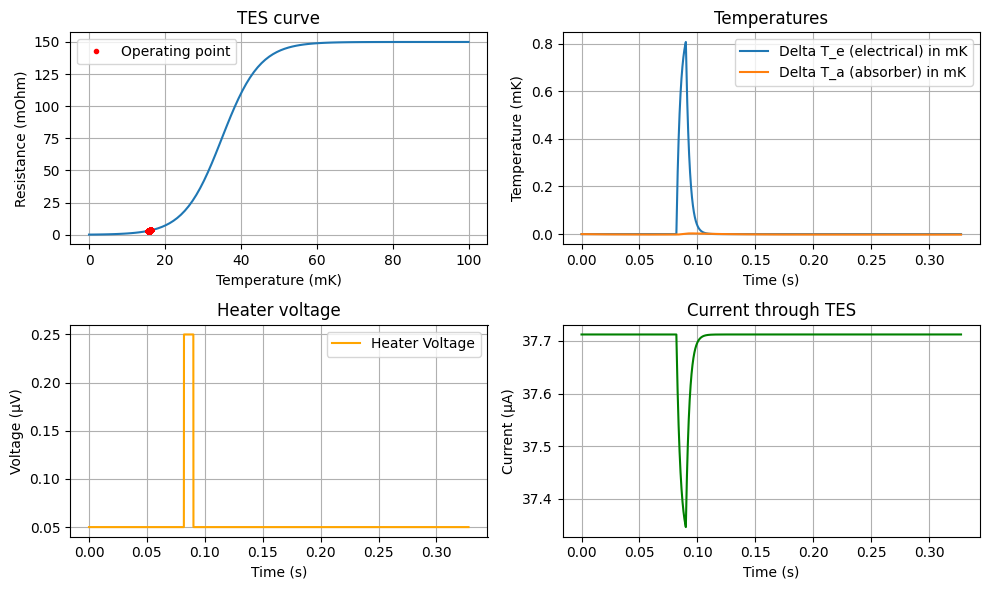

In [124]:
test_sim.render()

In [125]:
# Give out PH
print(f"Pulseheight PH is: {np.max(test_sim.I_T)-np.min(test_sim.I_T)}")

Pulseheight PH is: 3.652410682226492e-07


# Example 1: Do a heater sweep with constant testpulses

In [15]:
# Set constant TP amplitude
test_sim.set_heater_tp(tp_amplitude=200e-9) # TPA
test_sim.set_bias(1e-9)

heater_values = np.linspace(0, 2e-6, 20)
PH_list = []
for i in heater_values:
    print(i)
    test_sim.set_heater(i)
    test_sim.solve()
    PH_list.append(np.max(test_sim.I_T)-np.min(test_sim.I_T))

0.0
1.0526315789473683e-07
2.1052631578947366e-07
3.157894736842105e-07
4.2105263157894733e-07
5.263157894736842e-07
6.31578947368421e-07
7.368421052631578e-07
8.421052631578947e-07
9.473684210526315e-07
1.0526315789473683e-06
1.1578947368421053e-06
1.263157894736842e-06
1.3684210526315787e-06
1.4736842105263156e-06
1.5789473684210526e-06
1.6842105263157893e-06
1.789473684210526e-06
1.894736842105263e-06
2e-06


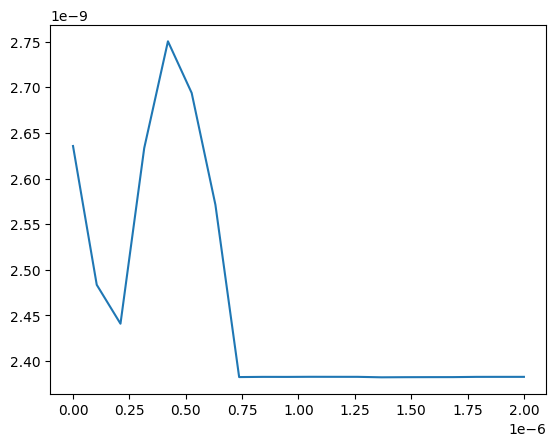

In [16]:
plt.plot(heater_values, PH_list)